In [1]:
import zipfile
import os

# Path to the .zip file
zip_file_path = '/content/nail disease dataset.zip'  # Update this path as needed
# Directory where the files will be extracted
extract_to_path = '/content/dataset/nail disease dataset/'

# Create the target directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Extract the .zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Files extracted successfully to:", extract_to_path)


Files extracted successfully to: /content/dataset/nail disease dataset/


Naive Bayes with Image Histograms or Color-Based Features

In [5]:
import os
import cv2
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Function to extract color histogram features
def extract_color_histogram(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read image {image_path}")
            return None
        # Convert to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Calculate histogram for each channel
        hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)
        return hist.flatten()
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Path to the dataset
dataset_path = "/content/dataset/nail disease dataset/nail disease dataset/data/"

# Initialize variables
X = []
y = []

# Process each class directory
for split in ["train", "validation"]:
    split_path = os.path.join(dataset_path, split)
    print(f"Processing directory: {split}")
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                features = extract_color_histogram(image_path)
                if features is not None:
                    X.append(features)
                    y.append(class_name)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert to NumPy arrays
X = np.array(X)
y_encoded = np.array(y_encoded)

print(f"Loaded {len(X)} samples with {len(set(y_encoded))} classes.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier and train it
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Processing directory: train
Processing directory: validation
Loaded 3835 samples with 6 classes.
Accuracy: 0.22685788787483702
Classification Report:
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.30      0.07      0.11       142
              Healthy_Nail       0.14      0.90      0.25        72
           Onychogryphosis       0.36      0.12      0.18       127
               blue_finger       0.29      0.35      0.32       129
                  clubbing       0.43      0.15      0.23       151
                   pitting       0.59      0.11      0.18       146

                  accuracy                           0.23       767
                 macro avg       0.35      0.28      0.21       767
              weighted avg       0.38      0.23      0.21       767



Multilayer Perceptrons (MLP) with Feature Extraction




In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier

# Function to extract color histogram features from an image
def extract_color_histogram(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read image {image_path}")
            return None
        # Convert to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Calculate histogram for each channel
        hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)
        return hist.flatten()
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Path to the dataset
dataset_path = "/content/dataset/nail disease dataset/nail disease dataset/data/"

# Initialize variables for features and labels
X = []
y = []

# Process each class directory for training and validation splits
for split in ["train", "validation"]:
    split_path = os.path.join(dataset_path, split)
    print(f"Processing directory: {split}")
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                features = extract_color_histogram(image_path)
                if features is not None:
                    X.append(features)
                    y.append(class_name)

# Encode labels and convert to NumPy arrays
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X = np.array(X)
y_encoded = np.array(y_encoded)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f"Loaded {len(X)} samples with {len(set(y_encoded))} classes.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = mlp_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Processing directory: train
Processing directory: validation
Loaded 3835 samples with 6 classes.
Accuracy: 0.44328552803129073
Classification Report:
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.38      0.34      0.36       143
              Healthy_Nail       0.70      0.70      0.70        67
           Onychogryphosis       0.47      0.44      0.46       151
               blue_finger       0.47      0.59      0.52       126
                  clubbing       0.41      0.43      0.42       164
                   pitting       0.32      0.30      0.31       116

                  accuracy                           0.44       767
                 macro avg       0.46      0.47      0.46       767
              weighted avg       0.44      0.44      0.44       767



Random Forest and Gradient Boosting Models (e.g., XGBoost)

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Function to extract color histogram features from an image
def extract_color_histogram(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read image {image_path}")
            return None
        # Convert to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Calculate histogram for each channel
        hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)
        return hist.flatten()
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Path to the dataset
dataset_path = "/content/dataset/nail disease dataset/nail disease dataset/data/"

# Initialize variables for features and labels
X = []
y = []

# Process each class directory for training and validation splits
for split in ["train", "validation"]:
    split_path = os.path.join(dataset_path, split)
    print(f"Processing directory: {split}")
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                features = extract_color_histogram(image_path)
                if features is not None:
                    X.append(features)
                    y.append(class_name)

# Encode labels and convert to NumPy arrays
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X = np.array(X)
y_encoded = np.array(y_encoded)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f"Loaded {len(X)} samples with {len(set(y_encoded))} classes.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=le.classes_)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(report_rf)

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict and evaluate the XGBoost model
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, target_names=le.classes_)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:")
print(report_xgb)


Processing directory: train
Processing directory: validation
Loaded 3835 samples with 6 classes.
Random Forest Accuracy: 0.560625814863103
Random Forest Classification Report:
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.48      0.48      0.48       143
              Healthy_Nail       0.94      0.88      0.91        67
           Onychogryphosis       0.64      0.58      0.61       151
               blue_finger       0.54      0.55      0.54       126
                  clubbing       0.54      0.52      0.53       164
                   pitting       0.43      0.53      0.47       116

                  accuracy                           0.56       767
                 macro avg       0.60      0.59      0.59       767
              weighted avg       0.57      0.56      0.56       767



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:18:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5723598435462842
XGBoost Classification Report:
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.45      0.52      0.48       143
              Healthy_Nail       0.92      0.91      0.92        67
           Onychogryphosis       0.61      0.51      0.55       151
               blue_finger       0.64      0.61      0.62       126
                  clubbing       0.57      0.59      0.58       164
                   pitting       0.45      0.46      0.45       116

                  accuracy                           0.57       767
                 macro avg       0.61      0.60      0.60       767
              weighted avg       0.58      0.57      0.57       767



K-Nearest Neighbors (KNN)


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Function to extract color histogram features from an image
def extract_color_histogram(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read image {image_path}")
            return None
        # Convert to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Calculate histogram for each channel
        hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)
        return hist.flatten()
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Path to the dataset
dataset_path = "/content/dataset/nail disease dataset/nail disease dataset/data/"

# Initialize variables for features and labels
X = []
y = []

# Process each class directory for training and validation splits
for split in ["train", "validation"]:
    split_path = os.path.join(dataset_path, split)
    print(f"Processing directory: {split}")
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                features = extract_color_histogram(image_path)
                if features is not None:
                    X.append(features)
                    y.append(class_name)

# Encode labels and convert to NumPy arrays
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X = np.array(X)
y_encoded = np.array(y_encoded)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f"Loaded {len(X)} samples with {len(set(y_encoded))} classes.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict and evaluate the KNN model
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=le.classes_)

print(f"KNN Accuracy: {accuracy_knn}")
print("KNN Classification Report:")
print(report_knn)


Processing directory: train
Processing directory: validation
Loaded 3835 samples with 6 classes.
KNN Accuracy: 0.36897001303780963
KNN Classification Report:
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.30      0.43      0.35       143
              Healthy_Nail       0.31      0.54      0.40        67
           Onychogryphosis       0.39      0.36      0.38       151
               blue_finger       0.45      0.42      0.43       126
                  clubbing       0.50      0.29      0.36       164
                   pitting       0.34      0.27      0.30       116

                  accuracy                           0.37       767
                 macro avg       0.38      0.38      0.37       767
              weighted avg       0.39      0.37      0.37       767



Support Vector Machine (SVM) with a Kernel


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Function to extract color histogram features from an image
def extract_color_histogram(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read image {image_path}")
            return None
        # Convert to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Calculate histogram for each channel
        hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)
        return hist.flatten()
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Path to the dataset
dataset_path = "/content/dataset/nail disease dataset/nail disease dataset/data/"

# Initialize variables for features and labels
X = []
y = []

# Process each class directory for training and validation splits
for split in ["train", "validation"]:
    split_path = os.path.join(dataset_path, split)
    print(f"Processing directory: {split}")
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                features = extract_color_histogram(image_path)
                if features is not None:
                    X.append(features)
                    y.append(class_name)

# Encode labels and convert to NumPy arrays
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X = np.array(X)
y_encoded = np.array(y_encoded)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f"Loaded {len(X)} samples with {len(set(y_encoded))} classes.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Support Vector Machine Classifier with RBF Kernel
svm_classifier = SVC(kernel='rbf')  # You can also try 'linear', 'poly', etc.
svm_classifier.fit(X_train, y_train)

# Predict and evaluate the SVM model
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, target_names=le.classes_)

print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(report_svm)


Processing directory: train
Processing directory: validation
Loaded 3835 samples with 6 classes.
SVM Accuracy: 0.4132985658409387
SVM Classification Report:
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.32      0.49      0.38       143
              Healthy_Nail       0.67      0.36      0.47        67
           Onychogryphosis       0.43      0.32      0.37       151
               blue_finger       0.52      0.37      0.43       126
                  clubbing       0.49      0.48      0.49       164
                   pitting       0.34      0.42      0.37       116

                  accuracy                           0.41       767
                 macro avg       0.46      0.41      0.42       767
              weighted avg       0.44      0.41      0.42       767



Transfer Learning with Pretrained CNNs

In [8]:
import os
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define paths for the dataset
dataset_path = "/content/dataset/nail disease dataset/nail disease dataset/data/"
img_size = (160, 160)  # Using MobileNetV2's input size

# Prepare the image data generator for training and validation
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    class_mode='categorical',  # for multi-class classification
    subset='training',
    batch_size=16  # Smaller batch size
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    class_mode='categorical',  # for multi-class classification
    subset='validation',
    batch_size=16  # Smaller batch size
)

# Load the MobileNetV2 model with pretrained weights, excluding the top fully connected layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the first 100 layers in the base model to prevent them from being updated during training
for layer in base_model.layers[:100]:
    layer.trainable = False

# Build the new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization to prevent overfitting
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)  # Changed to .keras extension

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

# Save the model
model.save('nail_disease_vgg16_model.h5')
print("Model saved as nail_disease_vgg16_model.h5")



Found 3069 images belonging to 2 classes.
Found 766 images belonging to 2 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
192/192 [==============================] - 31s 133ms/step - loss: 0.8145 - accuracy: 0.9674 - val_loss: 3.1837 - val_accuracy: 0.9765
Epoch 2/10
192/192 [==============================] - 24s 125ms/step - loss: 0.2116 - accuracy: 0.9762 - val_loss: 0.6582 - val_accuracy: 0.9765
Epoch 3/10
192/192 [==============================] - 23s 120ms/step - loss: 0.1771 - accuracy: 0.9762 - val_loss: 1.1936 - val_accuracy: 0.9765
Epoch 4/10
192/192 [==============================] - 23s 120ms/step - loss: 0.1542 - accuracy: 0.9762 - val_loss: 0.6764 - val_accuracy: 0.9765
Epoch 5/10
192/192 [==============================] - 23s 121ms/step - loss: 0.1420 - accuracy: 0.9762 - val_loss: 0.8502 - val_accuracy: 0.9765
Epoch 6/10
192/192 [==============================] - 23s 121ms/step - loss: 0.1402 - accuracy: 0.9762 - val_loss: 1.0078 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as nail_disease_vgg16_model.h5


48/48 [==============================] - 3s 54ms/step - loss: 0.6582 - accuracy: 0.9765
Validation Loss: 0.6582, Validation Accuracy: 0.9765
48/48 [==============================] - 4s 58ms/step


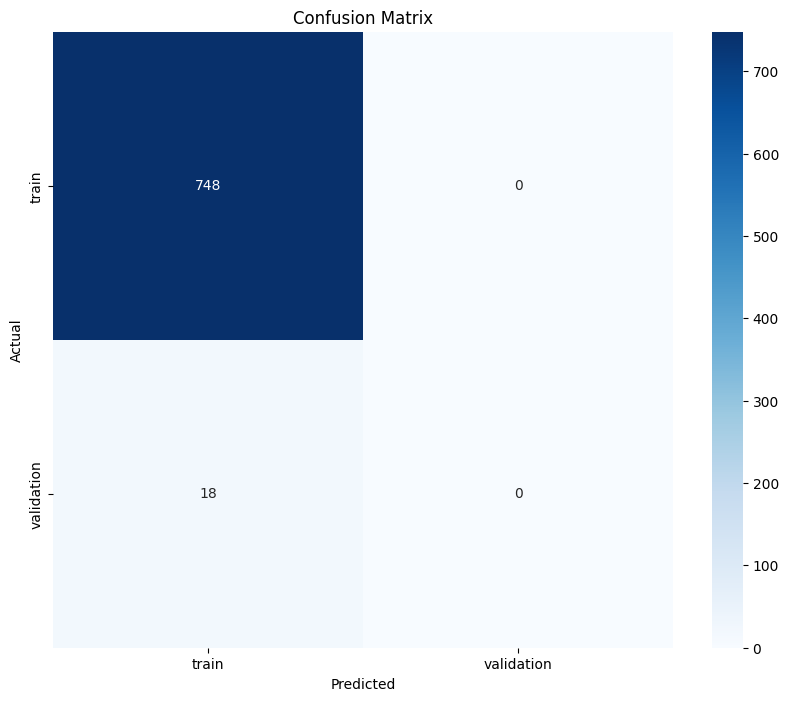

              precision    recall  f1-score   support

       train       0.98      1.00      0.99       748
  validation       0.00      0.00      0.00        18

    accuracy                           0.98       766
   macro avg       0.49      0.50      0.49       766
weighted avg       0.95      0.98      0.96       766



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Assuming validation_generator is already defined and contains the validation data
val_loss, val_accuracy = model.evaluate(validation_generator)

# Print validation results
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Get predictions and true labels
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(true_classes, predicted_classes,
                            target_names=validation_generator.class_indices.keys()))


Convolutional Neural Networks (CNNs)


In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for the dataset
dataset_path = "/content/dataset/nail disease dataset/nail disease dataset/data/"
img_size = (128, 128)  # Define image size

# Prepare the image data generator for training and validation
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Create training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    class_mode='categorical',  # for multi-class classification
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    class_mode='categorical',  # for multi-class classification
    subset='validation'
)

# Build the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization to prevent overfitting

# Output Layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Found 3069 images belonging to 2 classes.
Found 766 images belonging to 2 classes.
Epoch 1/10
96/96 [==============================] - 12s 116ms/step - loss: 0.1462 - accuracy: 0.9671 - val_loss: 0.1421 - val_accuracy: 0.9765
Epoch 2/10
96/96 [==============================] - 10s 104ms/step - loss: 0.1213 - accuracy: 0.9762 - val_loss: 0.1129 - val_accuracy: 0.9765
Epoch 3/10
96/96 [==============================] - 10s 104ms/step - loss: 0.1213 - accuracy: 0.9762 - val_loss: 0.1161 - val_accuracy: 0.9765
Epoch 4/10
96/96 [==============================] - 10s 104ms/step - loss: 0.1224 - accuracy: 0.9762 - val_loss: 0.1329 - val_accuracy: 0.9765
Epoch 5/10
96/96 [==============================] - 10s 103ms/step - loss: 0.1169 - accuracy: 0.9762 - val_loss: 0.1149 - val_accuracy: 0.9765
Epoch 6/10
96/96 [==============================] - 10s 103ms/step - loss: 0.1175 - accuracy: 0.9762 - val_loss: 0.1164 - val_accuracy: 0.9765
Epoch 7/10
96/96 [==============================] - 10s 103

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Placeholder for your actual model names; ensure these names match your trained models
try:
    model_predictions = {
        "Naive Bayes": naive_bayes_model.predict(X_test),
        "KNN": knn_model.predict(X_test),
        "SVM": svm_model.predict(X_test),
        "Random Forest": rf_model.predict(X_test),
        "Gradient Boosting": gb_model.predict(X_test),
        "CNN": cnn_model.predict(X_test),
        "Transfer Learning": transfer_learning_model.predict(X_test)
    }
except NameError as e:
    print(f"Model not found: {e}")
    model_predictions = {}

# Only add models with probabilities (replace with actual model names)
try:
    model_probabilities = {
        "Random Forest": rf_model.predict_proba(X_test),
        "Gradient Boosting": gb_model.predict_proba(X_test),
        "CNN": cnn_model.predict(X_test),
        "Transfer Learning": transfer_learning_model.predict(X_test)
    }
except NameError as e:
    print(f"Model with probability not found: {e}")
    model_probabilities = {}

# Step 1: Calculate Metrics for Each Model
metrics = {}
for model_name, y_pred in model_predictions.items():
    metrics[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

metrics_df = pd.DataFrame(metrics).T
print("Metrics Summary:")
print(metrics_df)

# Step 2: Confusion Matrices
for model_name, y_pred in model_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Step 3: ROC-AUC Curves for Models with Probabilities
if model_probabilities:
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Adjust based on the number of classes

    plt.figure(figsize=(10, 8))
    for model_name, y_pred_proba in model_probabilities.items():
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc="lower right")
    plt.show()


Model not found: name 'naive_bayes_model' is not defined
Model with probability not found: name 'rf_model' is not defined
Metrics Summary:
Empty DataFrame
Columns: []
Index: []


In [10]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define paths for the dataset
dataset_path = "/content/dataset/nail disease dataset/nail disease dataset/data/"
img_size = (128, 128)  # Define image size

# Data augmentation configuration
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Keep this to separate your validation set
)

# Creating the training and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    class_mode='categorical',
    subset='training',
    batch_size=16  # Adjust as needed
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    class_mode='categorical',
    subset='validation',
    batch_size=16  # Adjust as needed
)

# Build the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization to prevent overfitting

# Output Layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
model.fit(train_generator,
          epochs=50,  # Increase epochs for better training
          validation_data=validation_generator,
          callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Found 3069 images belonging to 2 classes.
Found 766 images belonging to 2 classes.
Epoch 1/50
192/192 [==============================] - 23s 114ms/step - loss: 0.1662 - accuracy: 0.9759 - val_loss: 0.1125 - val_accuracy: 0.9765 - lr: 0.0010
Epoch 2/50
192/192 [==============================] - 21s 111ms/step - loss: 0.1313 - accuracy: 0.9762 - val_loss: 0.1117 - val_accuracy: 0.9765 - lr: 0.0010
Epoch 3/50
192/192 [==============================] - 21s 111ms/step - loss: 0.1212 - accuracy: 0.9762 - val_loss: 0.1118 - val_accuracy: 0.9765 - lr: 0.0010
Epoch 4/50
192/192 [==============================] - 21s 110ms/step - loss: 0.1358 - accuracy: 0.9762 - val_loss: 0.1142 - val_accuracy: 0.9765 - lr: 0.0010
Epoch 5/50
192/192 [==============================] - 21s 109ms/step - loss: 0.1239 - accuracy: 0.9762 - val_loss: 0.1184 - val_accuracy: 0.9765 - lr: 0.0010
Epoch 6/50
192/192 [==============================] - 22s 113ms/step - loss: 0.1175 - accuracy: 0.9762 - val_loss: 0.1120 - val

In [12]:
# Save the model in the native Keras format
model.save('nail_disease_model.keras')


In [13]:
# After training the model
model.save('nail_disease_model.keras')  # Save the model in Keras format


Found 3744 images belonging to 6 classes.
Found 91 images belonging to 6 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/50
117/117 [==============================] - 42s 355ms/step - loss: 1.5687 - accuracy: 0.3726 - val_loss: 0.9496 - val_accuracy: 0.6562
Epoch 2/50
117/117 [==============================] - 41s 352ms/step - loss: 1.2751 - accuracy: 0.4701 - val_loss: 0.9026 - val_accuracy: 0.6250
Epoch 3/50
117/117 [==============================] - 41s 351ms/step - loss: 1.2087 - accuracy: 0.5008 - val_loss: 0.8637 - val_accuracy: 0.6875
Epoch 4/50
117/117 [==============================] - 41s 352ms/step - loss: 1.1693 - accuracy: 0.5243 - val_loss: 1.0511 - val_accuracy: 0.4219
Epoch 5/50
117/117 [==============================] - 41s 352ms/step - loss: 1.1521 - accuracy: 0.5264 - val_loss: 0.7967 - val_accuracy: 0.6562
Epoch 6/50
117/117 [==============================] - 41s 352ms/step - loss: 1.1370 - accuracy: 0.5331 - val_loss: 0.7739 - val_

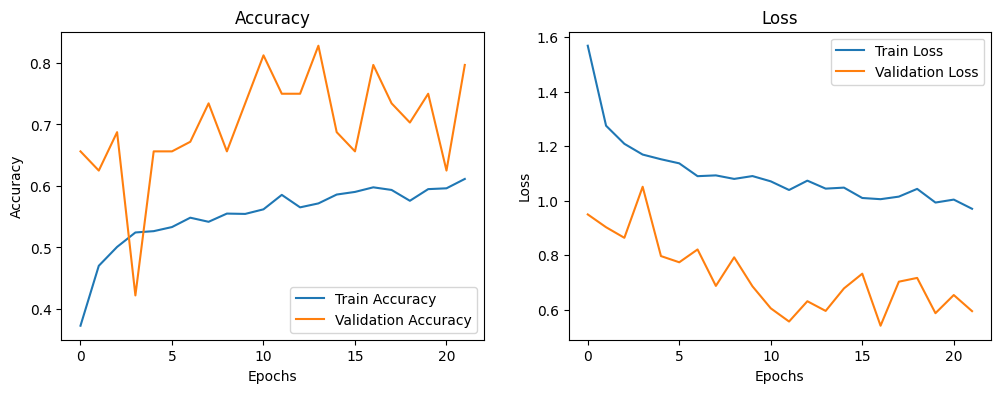

3/3 [==============================] - 1s 282ms/step
Classification Report:
                            precision    recall  f1-score   support

Acral_Lentiginous_Melanoma       0.87      0.72      0.79        18
              Healthy_Nail       1.00      1.00      1.00        20
           Onychogryphosis       0.64      0.75      0.69        12
               blue_finger       0.75      0.67      0.71         9
                  clubbing       0.75      0.75      0.75        16
                   pitting       0.89      1.00      0.94        16

                  accuracy                           0.84        91
                 macro avg       0.82      0.81      0.81        91
              weighted avg       0.84      0.84      0.83        91



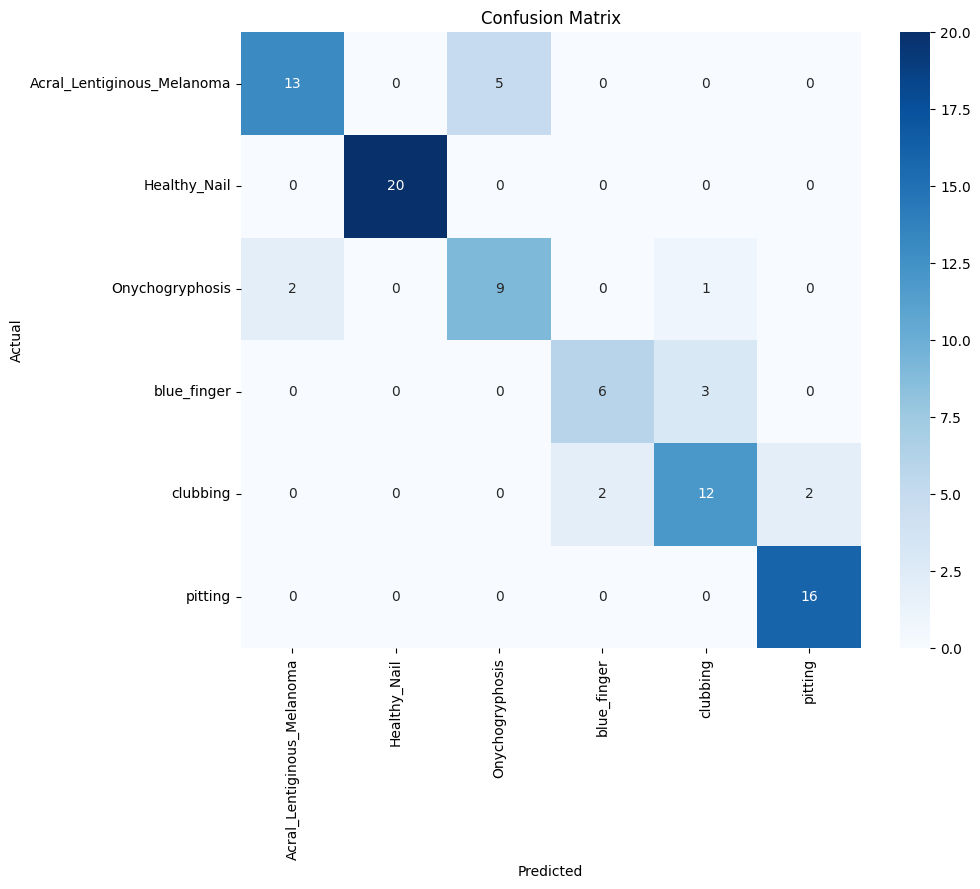

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set paths
train_data_dir = '/content/dataset/nail disease dataset/nail disease dataset/data/train'
validation_data_dir = '/content/dataset/nail disease dataset/nail disease dataset/data/validation'

# Set parameters
img_width, img_height = 160, 160
batch_size = 32
epochs = 50

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should only be rescaled
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint],
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(validation_generator.classes, y_pred, target_names=list(validation_generator.class_indices.keys())))

# Confusion Matrix
confusion_mtx = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=list(validation_generator.class_indices.keys()), yticklabels=list(validation_generator.class_indices.keys()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Save the final model
model.save('nail_disease_model.keras')  # Save in Keras format


In [16]:
# Import necessary libraries
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained Keras model
model.save('nail_disease_model_new.h5')  # Save the model in HDF5 format


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
